# Smart Lender

Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy

Import Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jbIgUq8OZxntFaOqru6SvInqPaUN8SOBdNN7w1D75-4Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlenderapplicantcredibilitypr-donotdelete-pr-ew6lpuekndfnbg'
object_key = 'train_ctrUa4K.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jbIgUq8OZxntFaOqru6SvInqPaUN8SOBdNN7w1D75-4Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlenderapplicantcredibilitypr-donotdelete-pr-ew6lpuekndfnbg'
object_key = 'train_ctrUa4K.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jbIgUq8OZxntFaOqru6SvInqPaUN8SOBdNN7w1D75-4Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'smartlenderapplicantcredibilitypr-donotdelete-pr-ew6lpuekndfnbg'
object_key = 'test_lAUu6dG.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
data=pd.concat([df_data_1,df_data_2])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Univariate Analysis

In [4]:
data.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


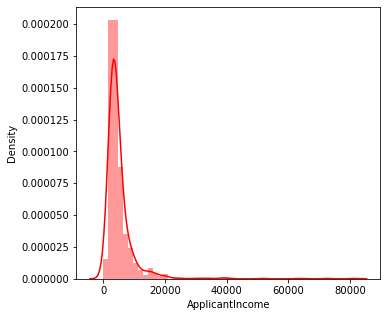

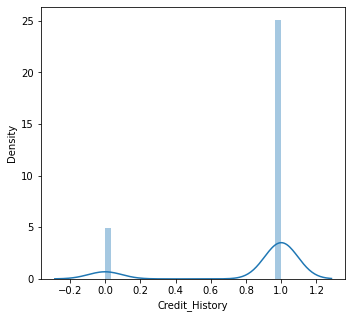

In [6]:
#Univariate Analysis
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.figure(figsize=(12,5))
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

Bivariate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

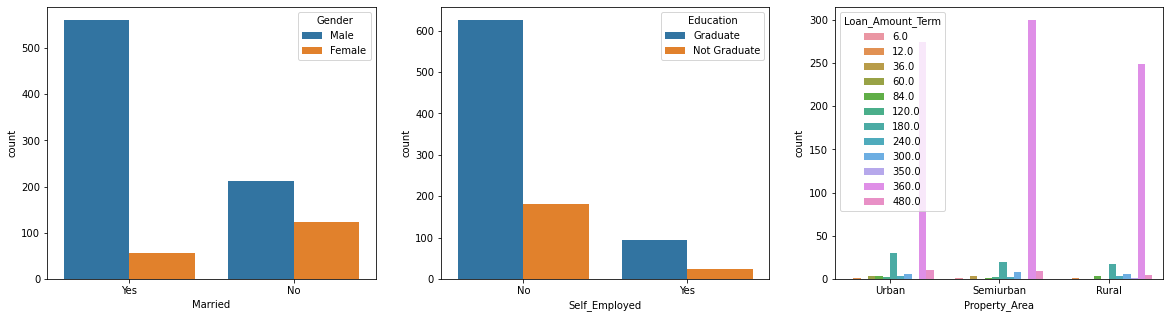

In [7]:
#Bivariate Analysis
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'],hue=data['Gender'])
plt.subplot(132)
sns.countplot(data['Self_Employed'],hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'],hue=data['Loan_Amount_Term'])

Multivariate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

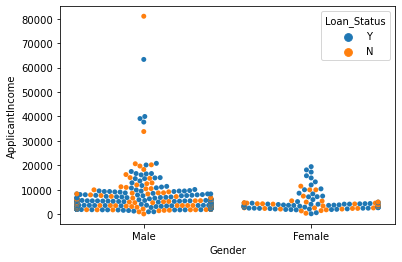

In [8]:
#Multivariate Analysis
sns.swarmplot(data['Gender'],data['ApplicantIncome'],hue=data['Loan_Status'])

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Perform descriptive statistics on the dataset.

In [10]:
data.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [11]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
data.drop(["Loan_ID"],axis=1,inplace=True)

In [13]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Handle the Missing values

In [14]:
data["Dependents"].replace({'3+': '3'}, inplace=True)

In [15]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 131.9+ KB


In [17]:
for i in [data]:
    i["Gender"]=i["Gender"].fillna(data.Gender.dropna().mode()[0])
    i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
    i["Dependents"]=i["Dependents"].fillna(data.Dependents.dropna().mode()[0]) 
    i["Self_Employed"]=i["Self_Employed"]. fillna(data.Self_Employed.dropna().mode()[0])
    i["Credit_History"]=i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])
    i["LoanAmount"]=i["LoanAmount"].fillna(data.LoanAmount.dropna().mean())
    i["Loan_Amount_Term"]=i["Loan_Amount_Term"].fillna(data.Loan_Amount_Term.dropna().mean())
    i["Credit_History"]=i["Credit_History"].fillna(data.Credit_History.dropna().mean())
    i["Loan_Status"]=i["Loan_Status"].fillna(data.Loan_Status.dropna().mode()[0])

Check for Categorical columns and perform encoding.

In [18]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data["Gender"]= label_encoder.fit_transform(data["Gender"])
data["Married"]= label_encoder.fit_transform(data["Married"])
data["Education"]= label_encoder.fit_transform(data["Education"])
data["Self_Employed"]= label_encoder.fit_transform(data["Self_Employed"])
data["Credit_History"]= label_encoder.fit_transform(data["Credit_History"])
data["Property_Area"]= label_encoder.fit_transform(data["Property_Area"])
data["Loan_Status"]= label_encoder.fit_transform(data["Loan_Status"])

In [19]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Split the data into dependent and independent variables

In [20]:
x=data.drop(columns=['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,360.0,1,2
1,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2
2,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2
3,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2
4,1,0,0,1,0,3276,0.0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2


In [21]:
y=data.iloc[:,11]
y

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 981, dtype: int64

Scale the independent variables

In [22]:
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [23]:
x_bal=pd.DataFrame(x_bal)

Split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_bal,y,test_size=0.3)

Build the Model

In [26]:
#decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

Train the Model and test the Model and Measure the performance using Metrics

In [28]:
def decisionTree(x_train,x_test,y_train,y_test):
    treemodel=DecisionTreeClassifier()
    treemodel.fit(x_train,y_train)
    y_pred=treemodel.predict(x_test)
    cv=cross_val_score(treemodel,x,y,cv=5)
    return f1_score(y_pred,y_test),np.mean(cv)

In [29]:
print(decisionTree(x_train,x_test,y_train,y_test))

(0.8205128205128206, 0.7165751579819746)


In [30]:
#Random forest 

In [31]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
cv=cross_val_score(rf,x,y,cv=5)
print((f1_score(y_pred,y_test),np.mean(cv)))

(0.8932806324110671, 0.7971563244587175)


In [32]:
#KNeighborsClassifier

In [33]:
def KNeighbors(x_train,x_test,y_train,y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train,y_train)
    yPred = knn_model.predict(x_test)
    cv=cross_val_score(knn_model,x,y,cv=5)
    return f1_score(yPred,y_test),np.mean(cv)

In [34]:
print(KNeighbors(x_train,x_test,y_train,y_test))

(0.8840864440078586, 0.769615663524293)


In [35]:
#GradientBoostingClassifier

In [36]:
def GradientBoosting(x_train,x_test,y_train,y_test):
    gb=GradientBoostingClassifier()
    gb.fit(x_train,y_train)
    yPred=gb.predict(x_test)
    cv=cross_val_score(gb,x,y,cv=5)
    return f1_score(yPred,y_test),np.mean(cv)

In [37]:
print(GradientBoosting(x_train,x_test,y_train,y_test))

(0.8884462151394422, 0.7940950999689216)


In [38]:
!pip install ibm_watson_machine_learning

In [39]:
api_key="iFY0zXPpW9WAKkEngxaszWLAMJARuVJzMZgH53lU3o7o"   
location="us-south"

In [40]:
from ibm_watson_machine_learning import APIClient
wml_credentails={
    "apikey":api_key, 
    "url":'https://'+ location + '.ml.cloud.ibm.com'
}
client=APIClient(wml_credentails)

In [41]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [42]:
space_uid=guid_from_space_name(client,'models')
print("Space UID=" + space_uid)

Space UID=892c12d5-04ab-4eb0-870c-1f3c0dacc308


In [43]:
client.set.default_space(space_uid)

'SUCCESS'

In [44]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [47]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [48]:
model_details=client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"Smart_lender",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                           )
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [50]:
model_id

'43a80bd4-bb11-45d6-a7b6-fef8264e2dc9'

In [51]:
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
cv=cross_val_score(rf,x,y,cv=5)
print(f1_score(y_pred,y_test),np.mean(cv))

0.8932806324110671 0.8063348181912359


In [55]:
pickle.dump(rf,open('model.pkl','wb'))

In [56]:
x=[[1,1,0,0,1,4000,1000,120,360,1,1]]
y=rf.predict(x)
y

array([1])